In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
import PIL
import cv2

In [3]:
import pathlib
import os
import sys

In [4]:
import requests
import IPython

In [5]:
url = 'https://raw.githubusercontent.com/mickee00000/Research_Internship/main/part1.jpeg'
r = requests.get(url, allow_redirects=True)
open('part1.jpeg', 'wb').write(r.content)

94205

In [6]:
hindi_data = tf.keras.utils.get_file('hindi_text', origin = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip', cache_dir='.', extract=True, archive_format='zip')
hindi_data

80429056/80417803 [==============================] - 2s 0us/step


'./datasets/hindi_text'

In [7]:
hindi_data_train = pathlib.Path(r'datasets/DevanagariHandwrittenCharacterDataset/Train')
hindi_data_train

PosixPath('datasets/DevanagariHandwrittenCharacterDataset/Train')

In [8]:
hindi_data_test = pathlib.Path(r'datasets/DevanagariHandwrittenCharacterDataset/Test')
hindi_data_test

PosixPath('datasets/DevanagariHandwrittenCharacterDataset/Test')

In [9]:
image_count = len(list(hindi_data_train.glob('*/*.png')))
image_count

78200

In [10]:
len(list(hindi_data_train.glob('character_3_ga/*')))

1700

In [11]:
hindi_letters_dict_train = {
    'sa': list(hindi_data_train.glob('character_32_patalosaw/*')),
    're': list(hindi_data_train.glob('character_27_ra/*')),
    'ga': list(hindi_data_train.glob('character_3_ga/*')),
    'ma': list(hindi_data_train.glob('character_25_ma/*')),
    'pa': list(hindi_data_train.glob('character_21_pa/*')),
    'dha': list(hindi_data_train.glob('character_19_dha/*')),
    'ni': list(hindi_data_train.glob('character_20_na/*')),
    #'zero': list(hindi_data_train.glob('digit_0/*')),
    #'one': list(hindi_data_train.glob('digit_1/*')),
    #'two': list(hindi_data_train.glob('digit_2/*')),
    #'three': list(hindi_data_train.glob('digit_3/*')),
    #'four': list(hindi_data_train.glob('digit_4/*')),
    #'five': list(hindi_data_train.glob('digit_5/*')),
    #'six': list(hindi_data_train.glob('digit_6/*')),
    #'seven': list(hindi_data_train.glob('digit_7/*')),
    #'eight': list(hindi_data_train.glob('digit_8/*')),
    #'nine': list(hindi_data_train.glob('digit_9/*')),
}

In [12]:
hindi_letters_dict_test = {
    'sa': list(hindi_data_test.glob('character_32_patalosaw/*')),
    're': list(hindi_data_test.glob('character_27_ra/*')),
    'ga': list(hindi_data_test.glob('character_3_ga/*')),
    'ma': list(hindi_data_test.glob('character_25_ma/*')),
    'pa': list(hindi_data_test.glob('character_21_pa/*')),
    'dha': list(hindi_data_test.glob('character_19_dha/*')),
    'ni': list(hindi_data_test.glob('character_20_na/*')),
    #'zero': list(hindi_data_test.glob('digit_0/*')),
    #'one': list(hindi_data_test.glob('digit_1/*')),
    #'two': list(hindi_data_test.glob('digit_2/*')),
    #'three': list(hindi_data_test.glob('digit_3/*')),
    #'four': list(hindi_data_test.glob('digit_4/*')),
    #'five': list(hindi_data_test.glob('digit_5/*')),
    #'six': list(hindi_data_test.glob('digit_6/*')),
    #'seven': list(hindi_data_test.glob('digit_7/*')),
    #'eight': list(hindi_data_test.glob('digit_8/*')),
    #'nine': list(hindi_data_test.glob('digit_9/*')),
}

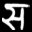

In [13]:
PIL.Image.open(hindi_letters_dict_train['sa'][0])

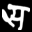

In [14]:
PIL.Image.open(hindi_letters_dict_train['sa'][5])

In [15]:
hindi_label_dict = {
    'sa': 0,
    're': 1,
    'ga': 2,
    'ma': 3,
    'pa': 4,
    'dha': 5,
    'ni': 6,
    #'zero': 7,
    #'one': 8,
    #'two': 9,
    #'three': 10,
    #'four': 11,
    #'five': 12,
    #'six': 13,
    #'seven': 14,
    #'eight': 15,
    #'nine': 16,
}

In [16]:
hindi_name_dict = {
     0: 'sa',
     1: 're',
     2: 'ga',
     3: 'ma',
     4: 'pa',
     5: 'dha',
     6: 'ni',
     #7: 'zero',
     #8: 'one',
     #9: 'two',
     #10: 'three',
     #11: 'four',
     #12: 'five',
     #13: 'six',
     #14: 'seven',
     #15: 'eight',
     #16: 'nine',
}

In [17]:
img = cv2.imread(str(hindi_letters_dict_train['re'][0]))


In [18]:
img

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [ 42,  42,  42],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [240, 240, 240],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [19]:
X_train = []
y_train = []

In [20]:
for key, value_list in hindi_letters_dict_train.items():
    for value in value_list:
        img = cv2.imread(str(value))
        img = cv2.resize(img,(32,32))
        _, img = cv2.threshold(img, 127,255, cv2.THRESH_BINARY_INV)
        X_train.append(img)
        y_train.append(hindi_label_dict[key])

In [21]:
X_test = []
y_test = []

In [22]:
for key, value_list in hindi_letters_dict_test.items():
    for value in value_list:
        img = cv2.imread(str(value))
        img = cv2.resize(img,(32,32))
        _, img = cv2.threshold(img, 127,255, cv2.THRESH_BINARY_INV)
        X_test.append(img)
        y_test.append(hindi_label_dict[key])

In [23]:
len(X_train)

11900

In [24]:
len(y_train)

11900

In [25]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [26]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [27]:
X_train.shape

(11900, 32, 32, 3)

In [28]:
X_test.shape

(2100, 32, 32, 3)

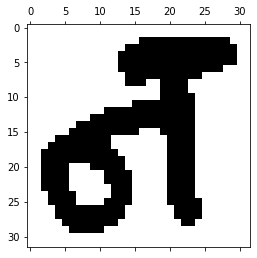

In [29]:
plt.matshow(X_train[11110])

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [31]:
hindi_name_dict[y_train[11110]]

'ni'

In [32]:
X_train_scaled.shape

(11900, 32, 32, 3)

In [33]:
#X_train_scaled_flat = np.reshape(#X_train_scaled, (28900, 32*32*3))

In [34]:
y_train[0]

0

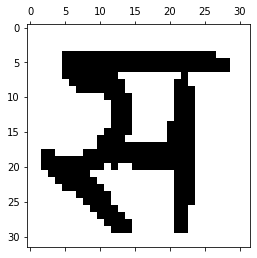

In [35]:
plt.matshow(X_train[0])

In [36]:
data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(32,32,3,)),
        keras.layers.experimental.preprocessing.RandomRotation(0.2),
        keras.layers.experimental.preprocessing.RandomZoom(0.1),
      
    ]
)

2022-07-06 07:27:42.308690: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-06 07:27:42.420547: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-06 07:27:42.421285: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-06 07:27:42.422551: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [37]:
model = keras.Sequential([
    data_augmentation,
    

    keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = 1,activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),
    keras.layers.Flatten(),


    keras.layers.Dense(128, activation = "relu", kernel_initializer = "uniform"),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(64, activation = "relu", kernel_initializer = "uniform"),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(7,activation = "softmax"),

])

In [38]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [39]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)         

In [40]:
model.fit(X_train_scaled, y_train, epochs = 100)

2022-07-06 07:27:46.268105: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-07-06 07:27:48.584563: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


372/372 [==============================] - 11s 7ms/step - loss: 1.0030 - accuracy: 0.6371
Epoch 2/100
372/372 [==============================] - 2s 7ms/step - loss: 0.4587 - accuracy: 0.8458
Epoch 3/100
372/372 [==============================] - 2s 7ms/step - loss: 0.3352 - accuracy: 0.8829
Epoch 4/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2898 - accuracy: 0.9031
Epoch 5/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2415 - accuracy: 0.9169
Epoch 6/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2060 - accuracy: 0.9311
Epoch 7/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1854 - accuracy: 0.9361
Epoch 8/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1756 - accuracy: 0.9445
Epoch 9/100
372/372 [==============================] - 2s 6ms/step - loss: 0.1668 - accuracy: 0.9435
Epoch 10/100
372/372 [==============================] - 2s 7ms/step - loss: 0.1494 - accuracy: 0.9497


In [41]:
model.evaluate(X_test_scaled, y_test)

66/66 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9905


[0.02734367363154888, 0.9904761910438538]

In [42]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)         

In [43]:
model.evaluate(X_test_scaled, y_test)

66/66 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9905


[0.02734367363154888, 0.9904761910438538]

In [44]:
url = 'https://raw.githubusercontent.com/mickee00000/Research_Internship/main/part1.jpeg'
r = requests.get(url, allow_redirects=True)
open('part1.jpeg', 'wb').write(r.content)

94205

In [45]:
notes = cv2.imread("part1.jpeg")
gray = cv2.cvtColor(notes, cv2.COLOR_BGR2GRAY)

In [46]:
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

In [47]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [48]:
dilation = cv2.dilate(thresh1, rect_kernel, iterations=1)

In [49]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [50]:
print(len(contours))

234


In [51]:
notes2 = notes.copy()

In [52]:
new_contours = []

In [53]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio_1 = h / w
    aspect_ratio_2 = w / h
    if aspect_ratio_1 < 3 and aspect_ratio_2 < 2 and w > 18 and h > 20:
        new_contours.append(cnt)

In [54]:
passer = []

In [55]:
num = len(new_contours) - 1
for cnt in new_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cropped = thresh1[y:y + h, x:x + w]
    cropped = cv2.cvtColor(cropped, cv2.IMREAD_GRAYSCALE)
    cropped = cv2.cvtColor(cropped, cv2.COLOR_BGRA2BGR)
    cropped = cv2.resize(cropped,(32,32))
    _, cropped = cv2.threshold(cropped, 127,255, cv2.THRESH_BINARY)
    cropped = cv2.bitwise_not(cropped)

    passer.append(cropped)
    cv2.rectangle(notes, (x-5, y-5), (x + w+5, y + h+5), (0, 0, 255), 2)
    cv2.putText(notes, "{}".format(num + 1), (x + 40, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 255), 2)
    num-=1

In [56]:
passer.reverse()

In [57]:
np.array(passer).shape

(152, 32, 32, 3)

j = 1 
path= '/tmp/'
for i in passer:
  cv2.imwrite(str(path)+str(j)+'.jpeg', i)
  j+=1


In [58]:
cv2.imwrite('bounded.jpeg', notes)

True

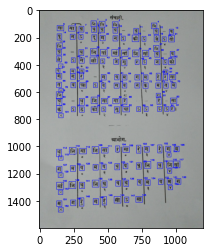

In [59]:
plt.imshow(notes)
plt.show()

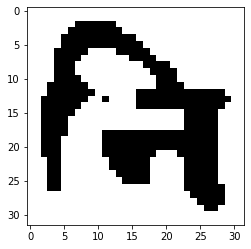

In [60]:
plt.imshow(passer[0])

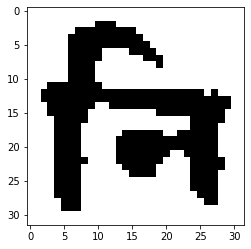

In [61]:
plt.imshow(passer[1])

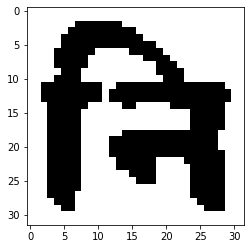

In [62]:
plt.imshow(passer[2])

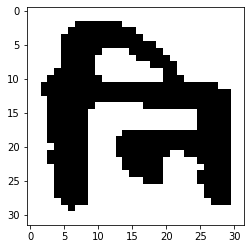

In [63]:
plt.imshow(passer[3])

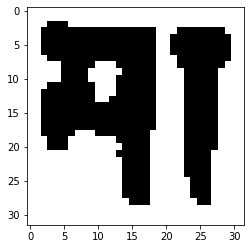

In [64]:
plt.imshow(passer[4])

In [65]:
passer = np.array(passer)

passer = passer / 255

In [66]:
result = model.predict(passer)

In [67]:
label_result = [np.argmax(i) for i in result]



In [68]:
notes_array = [hindi_name_dict[i] for i in label_result]
for i in range(len(notes_array)):
  print(i+1,notes_array[i])

1 ni
2 ni
3 ni
4 sa
5 ga
6 sa
7 dha
8 dha
9 sa
10 sa
11 dha
12 dha
13 pa
14 sa
15 ni
16 re
17 re
18 re
19 dha
20 ga
21 ni
22 ni
23 re
24 re
25 re
26 ni
27 ni
28 ni
29 dha
30 ni
31 dha
32 ni
33 ni
34 ni
35 ni
36 dha
37 pa
38 ni
39 ni
40 re
41 pa
42 ni
43 re
44 ga
45 re
46 ni
47 re
48 sa
49 ni
50 dha
51 pa
52 ma
53 ga
54 ga
55 ni
56 re
57 ma
58 ga
59 ga
60 ga
61 pa
62 sa
63 ga
64 ma
65 ma
66 ni
67 re
68 ma
69 re
70 ma
71 ni
72 ma
73 ma
74 ni
75 re
76 ma
77 re
78 ga
79 sa
80 ga
81 re
82 ni
83 sa
84 sa
85 ga
86 dha
87 ma
88 sa
89 sa
90 re
91 ga
92 ga
93 re
94 re
95 sa
96 re
97 re
98 re
99 ma
100 re
101 ni
102 re
103 re
104 ni
105 ga
106 ma
107 ga
108 ni
109 sa
110 sa
111 sa
112 sa
113 dha
114 pa
115 dha
116 ma
117 ni
118 ni
119 dha
120 ga
121 pa
122 sa
123 pa
124 pa
125 pa
126 ma
127 ga
128 ga
129 ni
130 ga
131 pa
132 pa
133 pa
134 ma
135 ni
136 sa
137 pa
138 sa
139 ni
140 ni
141 sa
142 ga
143 dha
144 ni
145 sa
146 sa
147 re
148 re
149 ga
150 ga
151 ma
152 re


In [69]:
music_translate = {
    'sa': 'C',
    're': 'D',
    'ga': 'E',
    'ma': 'F',
    'pa': 'G',
    'dha': 'A',
    'ni': 'B',
}

In [70]:
western_notes = [music_translate[i] for i in notes_array]
western_notes

['B',
 'B',
 'B',
 'C',
 'E',
 'C',
 'A',
 'A',
 'C',
 'C',
 'A',
 'A',
 'G',
 'C',
 'B',
 'D',
 'D',
 'D',
 'A',
 'E',
 'B',
 'B',
 'D',
 'D',
 'D',
 'B',
 'B',
 'B',
 'A',
 'B',
 'A',
 'B',
 'B',
 'B',
 'B',
 'A',
 'G',
 'B',
 'B',
 'D',
 'G',
 'B',
 'D',
 'E',
 'D',
 'B',
 'D',
 'C',
 'B',
 'A',
 'G',
 'F',
 'E',
 'E',
 'B',
 'D',
 'F',
 'E',
 'E',
 'E',
 'G',
 'C',
 'E',
 'F',
 'F',
 'B',
 'D',
 'F',
 'D',
 'F',
 'B',
 'F',
 'F',
 'B',
 'D',
 'F',
 'D',
 'E',
 'C',
 'E',
 'D',
 'B',
 'C',
 'C',
 'E',
 'A',
 'F',
 'C',
 'C',
 'D',
 'E',
 'E',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'F',
 'D',
 'B',
 'D',
 'D',
 'B',
 'E',
 'F',
 'E',
 'B',
 'C',
 'C',
 'C',
 'C',
 'A',
 'G',
 'A',
 'F',
 'B',
 'B',
 'A',
 'E',
 'G',
 'C',
 'G',
 'G',
 'G',
 'F',
 'E',
 'E',
 'B',
 'E',
 'G',
 'G',
 'G',
 'F',
 'B',
 'C',
 'G',
 'C',
 'B',
 'B',
 'C',
 'E',
 'A',
 'B',
 'C',
 'C',
 'D',
 'D',
 'E',
 'E',
 'F',
 'D']

In [71]:
pitchnames = sorted(set(western_notes))

pitchnames

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [72]:
!pip install music21

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 54.8 MB/s eta 0:00:00


In [73]:
from music21 import converter, instrument, note, chord, stream

In [74]:
offset = 0
output_notes = []

for value in western_notes:
    if('.' in value) or value.isdigit():
        chord_notes = value.split('.')
        notes = []
        for current_note in chord_notes:
            new_note = note.Note(int(current_note))
            new_note.storedInstrument = instrument.Piano()
            notes.append(new_note)
        new_chord = chord.Chord(notes)
        new_chord.offset = offset
        output_notes.append(new_chord)
    else:
        new_note = note.Note(value)
        new_note.offset = offset
        new_note.storedInstrument = instrument.Piano()
        output_notes.append(new_note)
    offset += 0.5

In [75]:
output_notes

[<music21.note.Note B>,
 <music21.note.Note B>,
 <music21.note.Note B>,
 <music21.note.Note C>,
 <music21.note.Note E>,
 <music21.note.Note C>,
 <music21.note.Note A>,
 <music21.note.Note A>,
 <music21.note.Note C>,
 <music21.note.Note C>,
 <music21.note.Note A>,
 <music21.note.Note A>,
 <music21.note.Note G>,
 <music21.note.Note C>,
 <music21.note.Note B>,
 <music21.note.Note D>,
 <music21.note.Note D>,
 <music21.note.Note D>,
 <music21.note.Note A>,
 <music21.note.Note E>,
 <music21.note.Note B>,
 <music21.note.Note B>,
 <music21.note.Note D>,
 <music21.note.Note D>,
 <music21.note.Note D>,
 <music21.note.Note B>,
 <music21.note.Note B>,
 <music21.note.Note B>,
 <music21.note.Note A>,
 <music21.note.Note B>,
 <music21.note.Note A>,
 <music21.note.Note B>,
 <music21.note.Note B>,
 <music21.note.Note B>,
 <music21.note.Note B>,
 <music21.note.Note A>,
 <music21.note.Note G>,
 <music21.note.Note B>,
 <music21.note.Note B>,
 <music21.note.Note D>,
 <music21.note.Note G>,
 <music21.note.N

In [76]:
output_notes[0]

<music21.note.Note B>

In [77]:
midi_stream = stream.Stream(output_notes)
fp = midi_stream.write('midi', fp='test_output.mid')

In [78]:
for thisNote in midi_stream.getElementsByClass(note.Note):
    print(thisNote, thisNote.offset)

<music21.note.Note B> 0.0
<music21.note.Note B> 0.5
<music21.note.Note B> 1.0
<music21.note.Note C> 1.5
<music21.note.Note E> 2.0
<music21.note.Note C> 2.5
<music21.note.Note A> 3.0
<music21.note.Note A> 3.5
<music21.note.Note C> 4.0
<music21.note.Note C> 4.5
<music21.note.Note A> 5.0
<music21.note.Note A> 5.5
<music21.note.Note G> 6.0
<music21.note.Note C> 6.5
<music21.note.Note B> 7.0
<music21.note.Note D> 7.5
<music21.note.Note D> 8.0
<music21.note.Note D> 8.5
<music21.note.Note A> 9.0
<music21.note.Note E> 9.5
<music21.note.Note B> 10.0
<music21.note.Note B> 10.5
<music21.note.Note D> 11.0
<music21.note.Note D> 11.5
<music21.note.Note D> 12.0
<music21.note.Note B> 12.5
<music21.note.Note B> 13.0
<music21.note.Note B> 13.5
<music21.note.Note A> 14.0
<music21.note.Note B> 14.5
<music21.note.Note A> 15.0
<music21.note.Note B> 15.5
<music21.note.Note B> 16.0
<music21.note.Note B> 16.5
<music21.note.Note B> 17.0
<music21.note.Note A> 17.5
<music21.note.Note G> 18.0
<music21.note.Note B>

In [79]:
midi_stream.show('midi')

In [80]:
IPython.display.Audio(fp)